In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Input

In [2]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")


In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [5]:
churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
churn_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [7]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

#### Missing Values Imputation

In [26]:
churn_df[churn_df["TotalCharges"].isnull()]["Churn"].value_counts()

No    27
Name: Churn, dtype: int64

In [8]:
churn_df["TotalCharges"].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
churn_df[churn_df["Churn"] == "No"].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


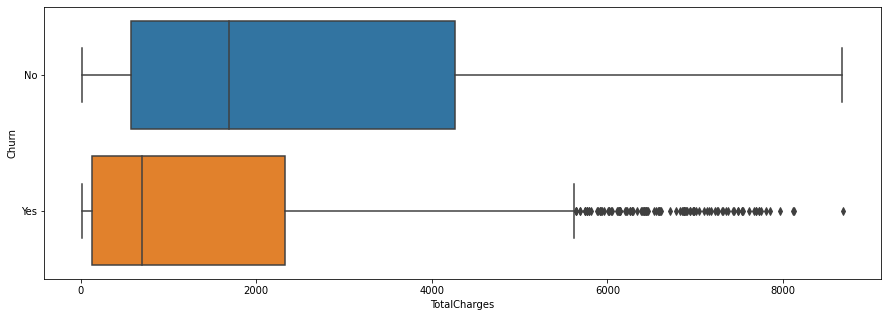

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y= "Churn", data = churn_df)

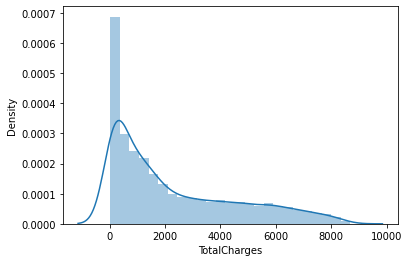

In [12]:
sns.distplot(churn_df["TotalCharges"], hist=True)

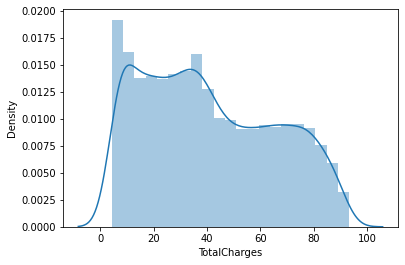

In [13]:
sns.distplot(churn_df["TotalCharges"].apply(np.sqrt), hist=True)

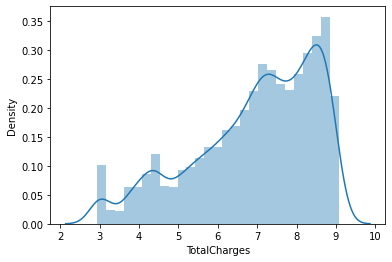

In [14]:
sns.distplot(churn_df["TotalCharges"].apply(np.log), hist=True)

Sqrt is better 

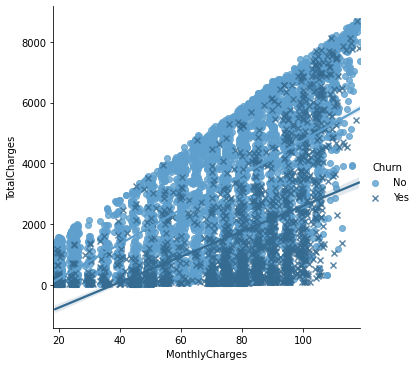

In [20]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
           markers = ["o", "x"], 
           palette="Blues_d")

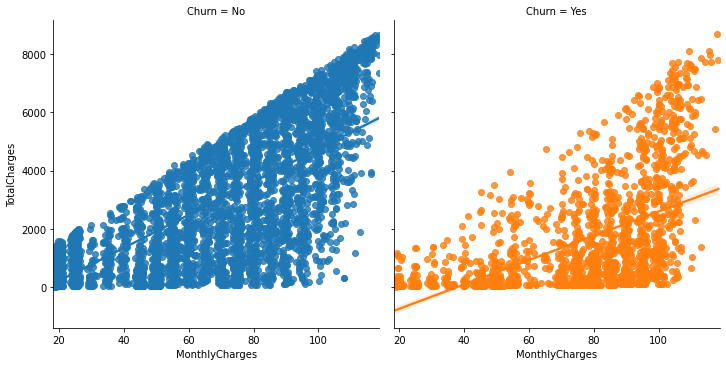

In [21]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn")

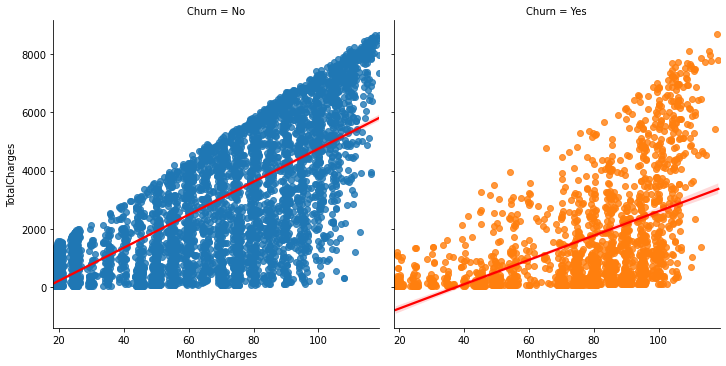

In [22]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn",
           line_kws={'color':'red'})

Weak Linear relationship

In [23]:
churn_df[["MonthlyCharges", "TotalCharges"]].corr() #[-1,1]

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.650964
TotalCharges,0.650964,1.000000


In [24]:
churn_df[churn_df["Churn"] == "No"][["MonthlyCharges", "TotalCharges"]].corr() 

,MonthlyCharges,TotalCharges
MonthlyCharges,1.00000,0.75739
TotalCharges,0.75739,1.00000


In [27]:
churn_no_df = churn_df[(churn_df["Churn"] == "No") & (churn_df["TotalCharges"].isna()==False)]


In [29]:
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["MonthlyCharges"], churn_no_df["TotalCharges"])

In [30]:
print("Slope ", slope)
print("Intercept ", intercept)
print("r-value ", r_value)
print("p_value ", p_value)
print("error ", std_err)
print("R-Squared ", r_value**2)

Slope  56.73637552696062
Intercept  -922.8160085118097
r-value  0.7573902887184033
p_value  0.0
error  0.6819261867835148
R-Squared  0.5736400494449463


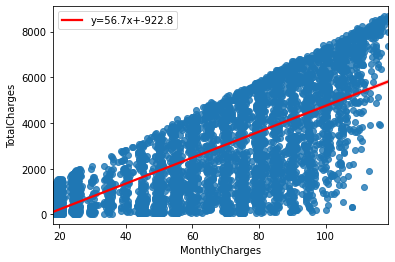

In [31]:
ax = sns.regplot(x="MonthlyCharges",
                 y="TotalCharges",
                 data=churn_no_df,
                 line_kws={"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

Tenure and MonthlyCharges didnt work well.

In [37]:
churn_df["tenure_charges"] = churn_df["tenure"] * churn_df["MonthlyCharges"]

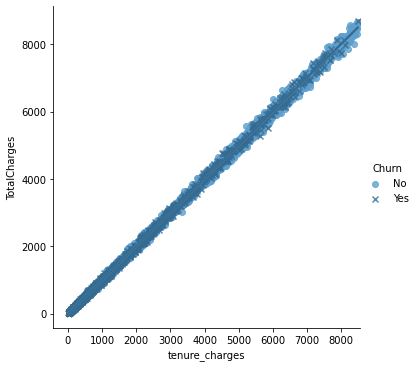

In [38]:
sns.lmplot(x="tenure_charges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
           markers = ["o", "x"], 
           palette="Blues_d")

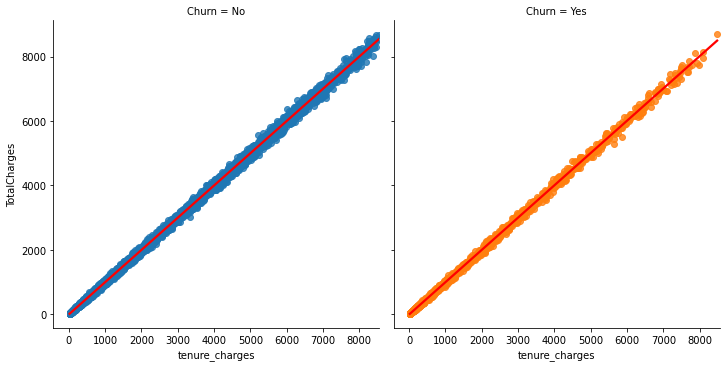

In [39]:
sns.lmplot(x="tenure_charges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn",
           line_kws={'color':'red'})

In [40]:
churn_df[["tenure_charges", "TotalCharges"]].corr() 

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999559
TotalCharges,0.999559,1.000000


In [41]:
churn_df[churn_df["Churn"] == "No"][["tenure_charges", "TotalCharges"]].corr() 

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999535
TotalCharges,0.999535,1.000000


In [42]:
churn_no_df = churn_df[(churn_df["Churn"] == "No") & (churn_df["TotalCharges"].isna()==False)]

In [43]:
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["tenure_charges"], churn_no_df["TotalCharges"])

In [44]:
print("Slope ", slope)
print("Intercept ", intercept)
print("r-value ", r_value)
print("p_value ", p_value)
print("error ", std_err)
print("R-Squared ", r_value**2)

Slope  1.0001720821518205
Intercept  -0.3010983695039613
r-value  0.9995350350972924
p_value  0.0
error  0.00042536192429779864
R-Squared  0.9990702863869455


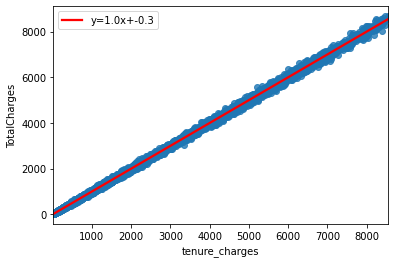

In [45]:
ax = sns.regplot(x="tenure_charges",
                 y="TotalCharges",
                 data=churn_no_df,
                 line_kws={"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

In [46]:
def fillna(tenure, monthlycharge):
  if tenure == 0:
    totalCharges = monthlycharge
  else:
    totalCharges = tenure * monthlycharge
    totalCharges = (slope*totalCharges) + intercept 
  return round(totalCharges, 2)

In [48]:
churn_df["TotalChargeNew"] = churn_df.apply(lambda x: x["TotalCharges"] if not pd.isna(x["TotalCharges"]) else fillna(x["tenure"], x["MonthlyCharges"]), axis=1 )

In [49]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges,TotalChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.40,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,0.00,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,0.00,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,0.00,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,0.00,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.30,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.00,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,0.00,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5980.80,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,357.20,356.96
